# Tests for static and adaptive Huffman algorithm
#### Implemented in files huffman.py and adaptive_huffman.py

In [7]:
import huffman
import adaptive_huffman
import os
import re
import time

def compression_level(org_file, comp_file):
    return 1 - (os.path.getsize(comp_file)/os.path.getsize(org_file))

def static_huffman_test(filename):
    with open(filename) as in_f:
        content = in_f.read()
        start_time = time.time()
        codes, encoded = huffman.encode(content)
        end_time = time.time()
        decrypted = huffman.decode(encoded, huffman.tree_from_codes(codes))
        if decrypted == content:
            print(f">>>>Static done in {end_time - start_time:.3f}s")
        else: 
            print("!!!!Static Huffman encoding failed")
    huffman.compress_file(filename)

def adaptive_huffman_test(filename):
    with open(filename) as in_f:
        content = in_f.read()
        start_time = time.time()
        encoded = adaptive_huffman.encode(content)
        end_time = time.time()
        decrypted = adaptive_huffman.decode(encoded)
        if decrypted == content:
            print(f">>>>Adaptive done in {end_time - start_time:.3f}s")
        else: 
            print("!!!!Adaptive Huffman encoding failed")
    adaptive_huffman.compress_file(filename)
    
def compression_level_test(filename):
    print("_________________")
    print(f"Compression levels for {filename}")
    comp_level_st = compression_level(filename, filename + ".sthuff")
    print(f">>>>Static: {100*comp_level_st:.1f}%")
    comp_level_ad = compression_level(filename, filename + ".dyhuff")
    print(f">>>>Adaptive: {100*comp_level_ad:.1f}%")

def compression_test(filename):
    print("_________________")
    print(f"Compression tests for {filename} of size {os.path.getsize(filename)/1000:.2f} kB")
    static_huffman_test(filename)
    adaptive_huffman_test(filename)
    
def decompression_test(filename):
    original = None
    with open(filename, "r") as file:
        original = file.read()
    print("_________________")
    print(f"Decompression tests for {filename} of size {os.path.getsize(filename)/1000:.2f} kB")
    start_time = time.time()
    decoded = huffman.decode_file(filename + ".sthuff")
    end_time = time.time()
    if original == decoded: 
        print(f">>>>Static done in {end_time - start_time:.3f}s")
    else:
        print(f"!!!!Static failed")
    start_time = time.time()
    adaptive_huffman.decode_file(filename + ".dyhuff")
    end_time = time.time()
    if original == decoded:
        print(f">>>>Adaptive done in {end_time - start_time:.3f}s")
    else:
        print(f"!!!!Adaptive failed")

def make_tests():
    test_subjects = ["test1.txt", "test2.txt", "test3.txt", "testHp.txt"]
    for test_file in test_subjects:
        compression_test(test_file)
        compression_level_test(test_file)
        decompression_test(test_file)
    

# Tests

In [8]:
make_tests()

_________________
Compression tests for test1.txt of size 1.03 kB
>>>>Static done in 0.004s
>>>>Adaptive done in 0.007s
_________________
Compression levels for test1.txt
>>>>Static: 39.2%
>>>>Adaptive: 43.1%
_________________
Decompression tests for test1.txt of size 1.03 kB
>>>>Static done in 0.001s
>>>>Adaptive done in 0.007s
_________________
Compression tests for test2.txt of size 10.27 kB
>>>>Static done in 0.002s
>>>>Adaptive done in 0.061s
_________________
Compression levels for test2.txt
>>>>Static: 45.7%
>>>>Adaptive: 46.1%
_________________
Decompression tests for test2.txt of size 10.27 kB
>>>>Static done in 0.007s
>>>>Adaptive done in 0.051s
_________________
Compression tests for test3.txt of size 100.48 kB
>>>>Static done in 0.017s
>>>>Adaptive done in 0.614s
_________________
Compression levels for test3.txt
>>>>Static: 46.4%
>>>>Adaptive: 46.4%
_________________
Decompression tests for test3.txt of size 100.48 kB
>>>>Static done in 0.069s
>>>>Adaptive done in 0.498s
_

# Example of built Huffman trees

In [9]:
sentence = "TOTOLOTO"

/home/pinio/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/pinio/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


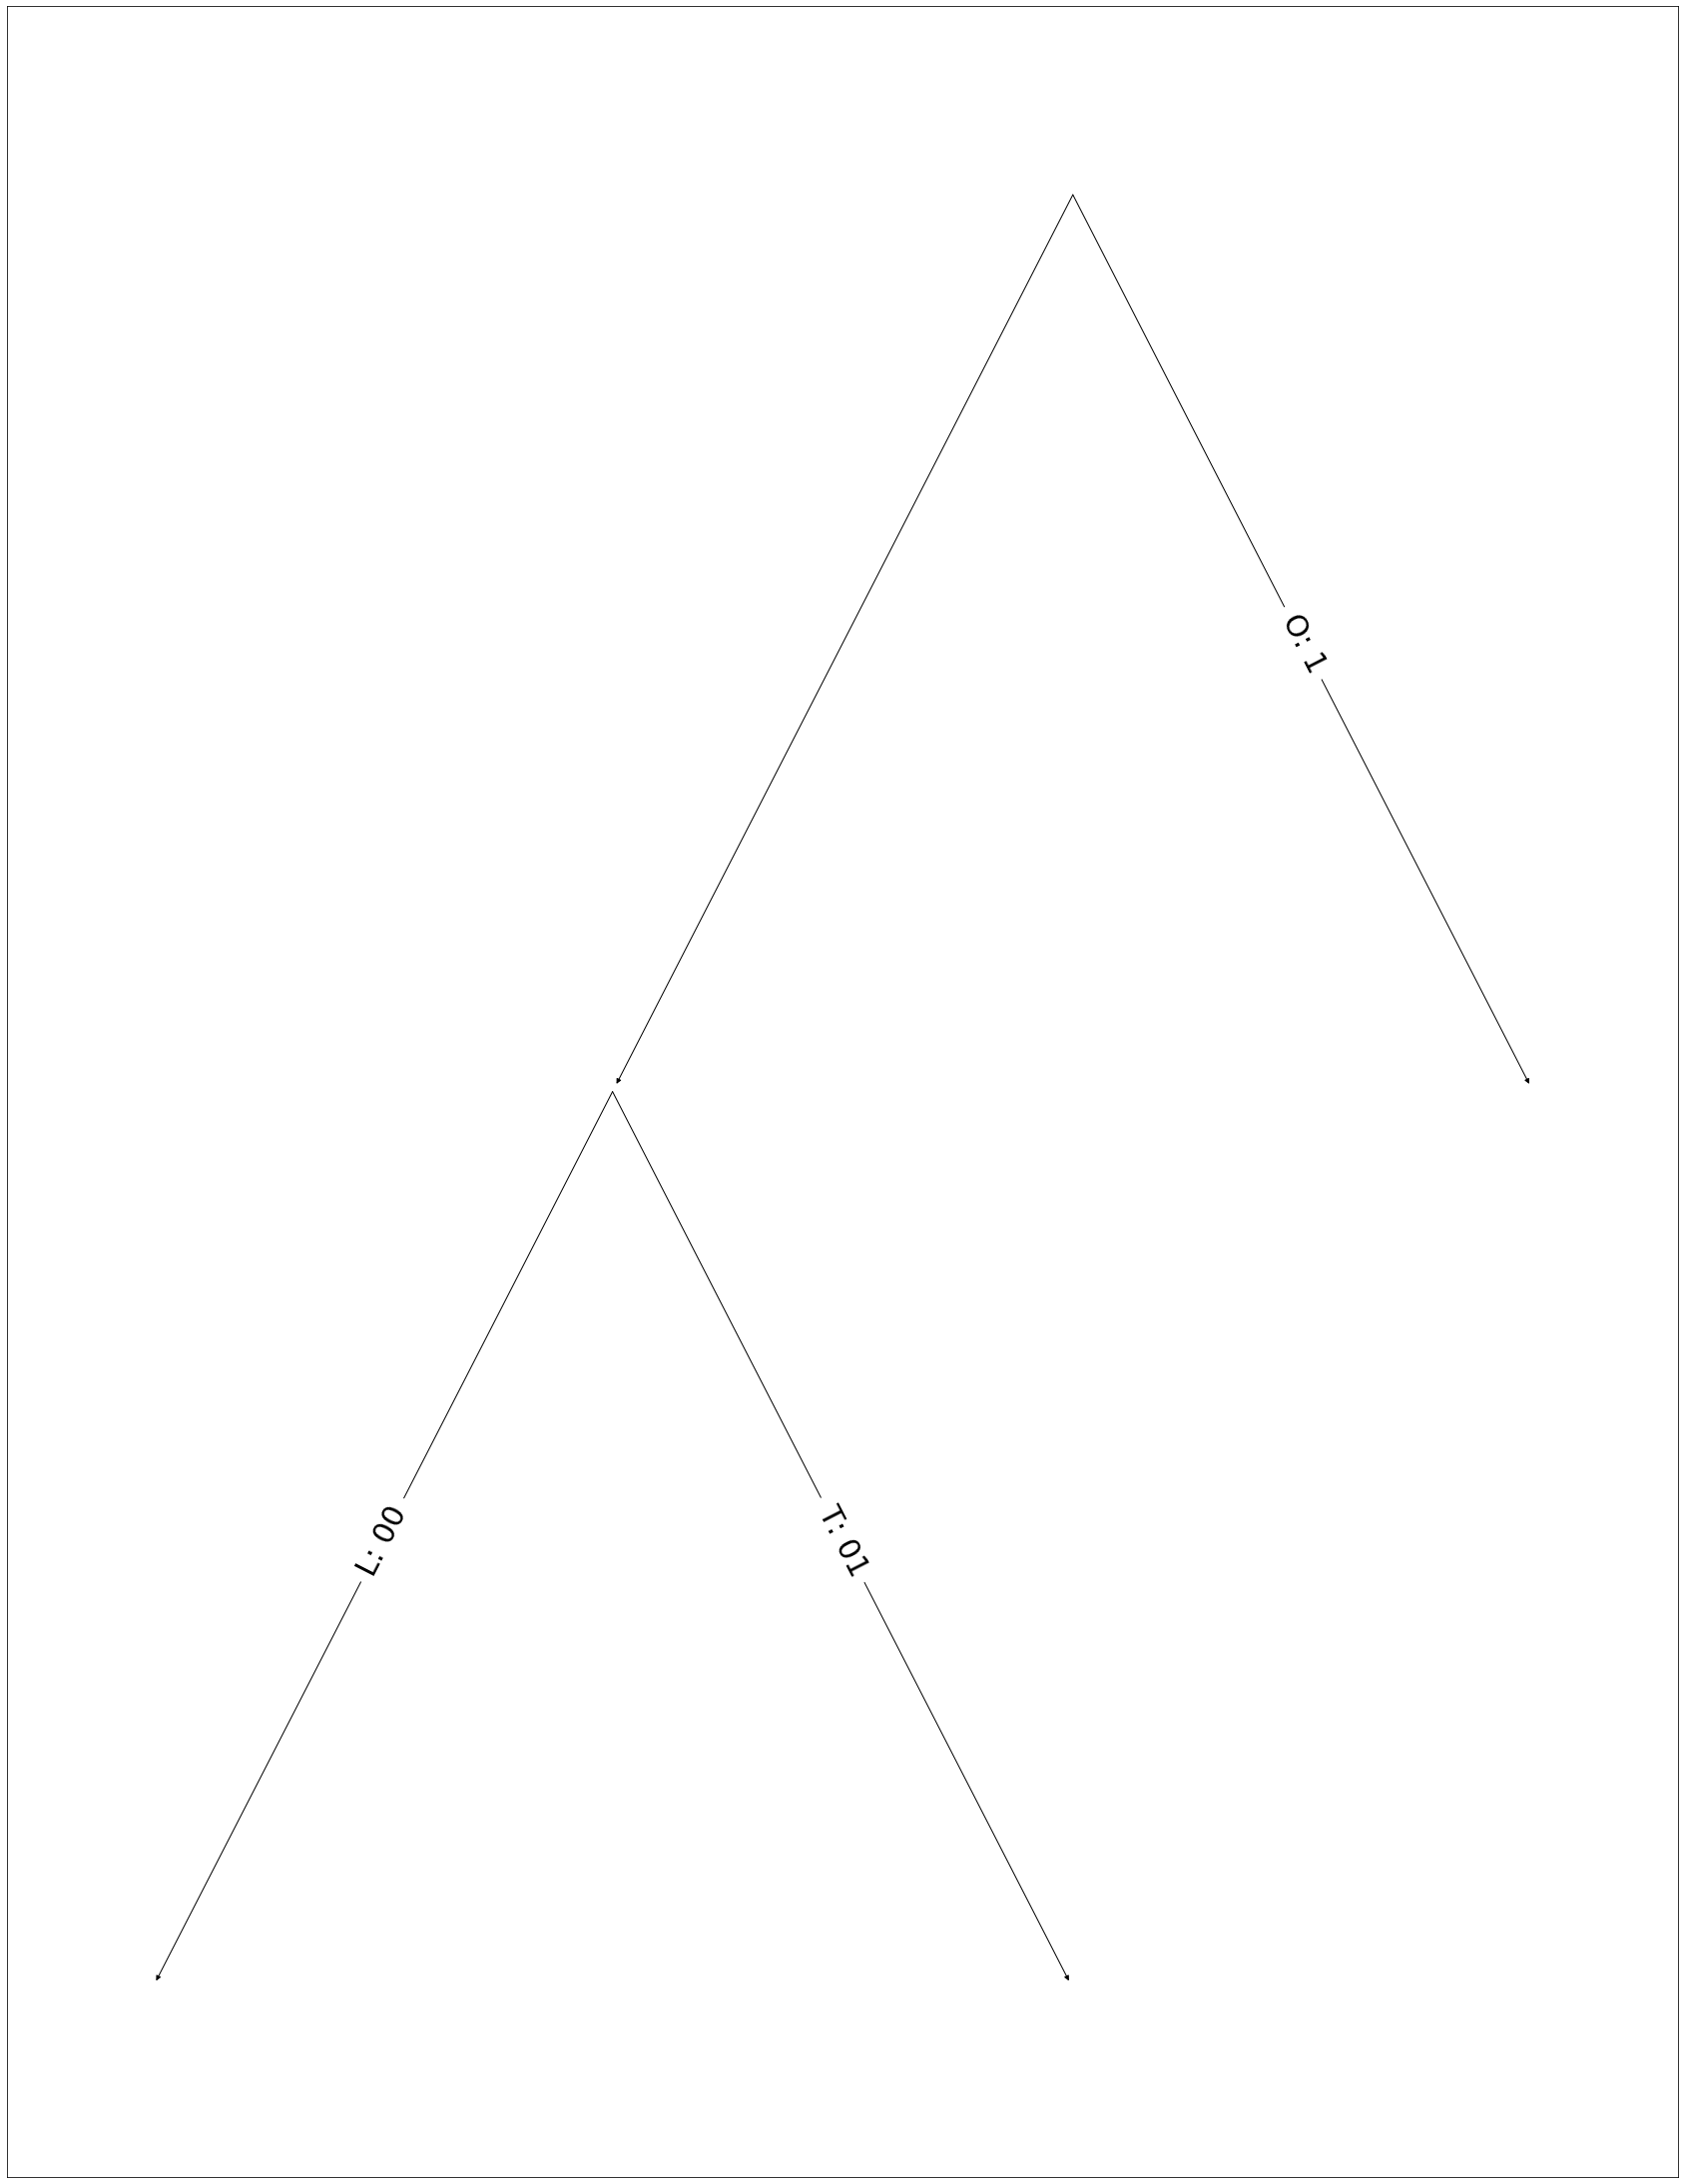

({'L': bitarray('00'), 'T': bitarray('01'), 'O': bitarray('1')},
 bitarray('011011001011'))

In [10]:
huffman.encode(sentence,draw_tree=True)

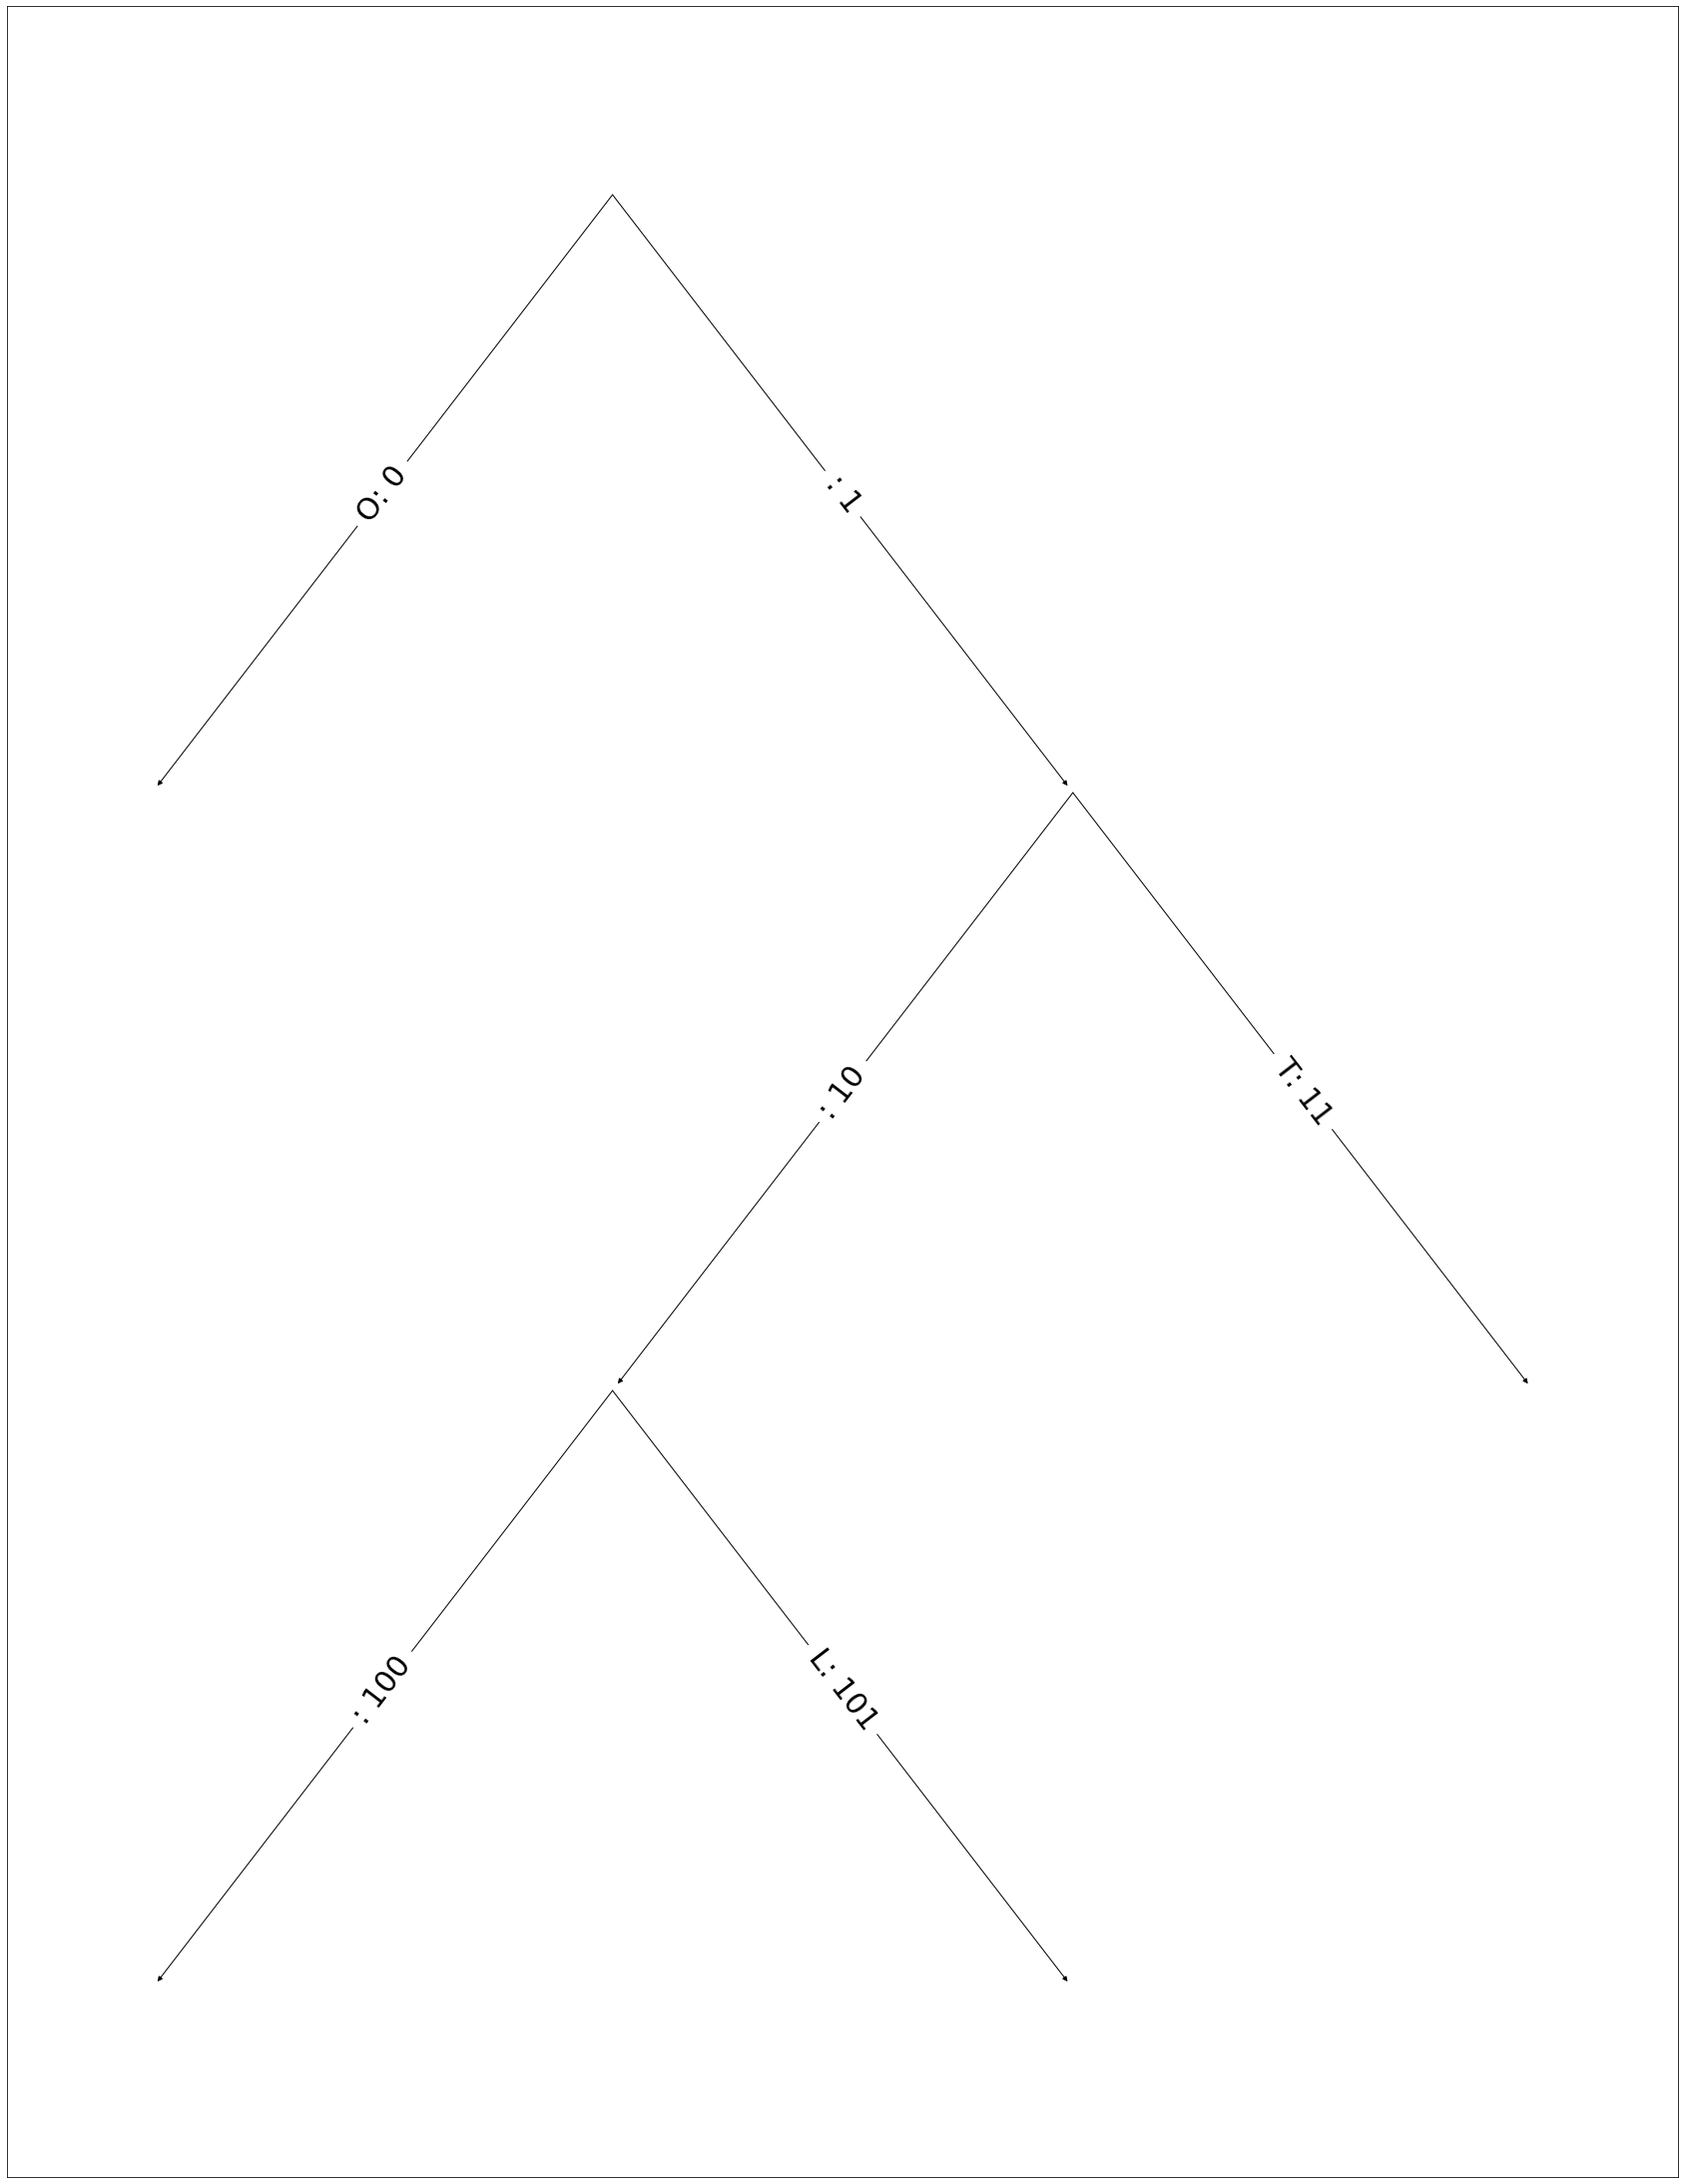

bitarray('01010100001001111101000100110011110')

In [11]:
adaptive_huffman.encode(sentence,draw_tree=True)